833 808
Mean Squared Error for Warm Season: 17.98698249771266
Mean Squared Error for Cold Season: 34.94656216841168
Mean Squared Error for Warm Season: 17.98698249771266
Mean Squared Error for Cold Season: 34.94656216841168


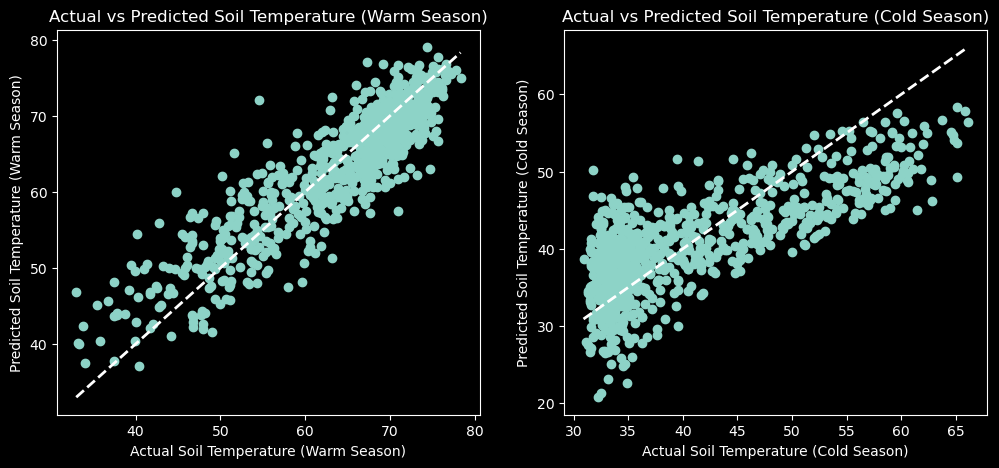

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Load daily data
data = pd.read_csv('daily.csv')

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Making months for cold season/warm season
warm_season = ['04', '05', '06', '07', '08', '09']
cold_season = ['10', '11', '12', '01', '02', '03']

# Mapping months to warm/cold
data['month'] = data['date'].dt.month
data['season'] = data['month'].astype(str).str.zfill(2)
season_mapping = {1: 'cold', 2: 'cold', 3: 'cold', 4: 'warm', 5: 'warm', 6: 'warm', 7: 'warm', 8: 'warm', 9: 'warm', 10: 'cold', 11: 'cold', 12: 'cold'}
data['season'] = data['month'].map(season_mapping)

# Dropping NaN values and extracting data to X and Y variables
data = data.dropna(subset=['s10t'])
X = data[['airt', 'prec', 'slrt', 'wspd']]
Y = data[['s10t']]

# Segmenting data into seasons
warm_data = data[data['season'] == 'warm']
X_warm = warm_data[['airt', 'prec', 'slrt', 'wspd']]
Y_warm = warm_data[['s10t']]
X_train_warm, X_test_warm, Y_train_warm, Y_test_warm = train_test_split(X_warm, Y_warm, test_size=0.2, random_state=42)



cold_data = data[data['season'] == 'cold']
X_cold = cold_data[['airt']]
Y_cold = cold_data[['s10t']]
X_train_cold, X_test_cold, Y_train_cold, Y_test_cold = train_test_split(X_cold, Y_cold, test_size=0.2, random_state=42)

# Assuming you want a common test set size for both warm and cold seasons
common_test_size = 0.2


X_train_warm = X_train_warm.dropna()
Y_train_warm = Y_train_warm.loc[X_train_warm.index]

X_train_cold = X_train_cold.dropna()
Y_train_cold = Y_train_cold.loc[X_train_cold.index]

X_test_warm = X_test_warm.dropna()
Y_test_warm = Y_test_warm.loc[X_test_warm.index]

X_test_cold = X_test_cold.dropna()
Y_test_cold = Y_test_cold.loc[Y_test_cold.index]
# Training for warm season
LRmodel_warm = LinearRegression()
LRmodel_warm.fit(X_train_warm, Y_train_warm)
LRpredict_warm = LRmodel_warm.predict(X_test_warm)
print(len(Y_test_warm), len(Y_test_cold))

# Training for cold season
LRmodel_cold = LinearRegression()
LRmodel_cold.fit(X_train_cold, Y_train_cold)
LRpredict_cold = LRmodel_cold.predict(X_test_cold)

# Trim the longer set to match the length of the shorter set
min_length = min(len(Y_test_warm), len(LRpredict_warm), len(Y_test_cold), len(LRpredict_cold))
Y_test_warm = Y_test_warm[:min_length]
LRpredict_warm = LRpredict_warm[:min_length]
Y_test_cold = Y_test_cold[:min_length]
LRpredict_cold = LRpredict_cold[:min_length]

# Evaluate and print
mse_warm = mean_squared_error(Y_test_warm, LRpredict_warm)
mse_cold = mean_squared_error(Y_test_cold, LRpredict_cold)
print(f'Mean Squared Error for Warm Season: {mse_warm}')
print(f'Mean Squared Error for Cold Season: {mse_cold}')

# Evaluate and print
mse_warm = mean_squared_error(Y_test_warm, LRpredict_warm)
mse_cold = mean_squared_error(Y_test_cold, LRpredict_cold)
print(f'Mean Squared Error for Warm Season: {mse_warm}')
print(f'Mean Squared Error for Cold Season: {mse_cold}')

# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for Warm Season
axs[0].scatter(Y_test_warm, LRpredict_warm) 
axs[0].plot([Y_test_warm.min(), Y_test_warm.max()], [Y_test_warm.min(), Y_test_warm.max()], 'k--', color='white', lw=2)  # y = x line
axs[0].set_xlabel('Actual Soil Temperature (Warm Season)')
axs[0].set_ylabel('Predicted Soil Temperature (Warm Season)')
axs[0].set_title('Actual vs Predicted Soil Temperature (Warm Season)')

# Plot for Cold Season
axs[1].scatter(Y_test_cold, LRpredict_cold)
axs[1].plot([Y_test_cold.min(), Y_test_cold.max()], [Y_test_cold.min(), Y_test_cold.max()], 'k--', color='white', lw=2)  # y = x line
axs[1].set_xlabel('Actual Soil Temperature (Cold Season)')
axs[1].set_ylabel('Predicted Soil Temperature (Cold Season)')
axs[1].set_title('Actual vs Predicted Soil Temperature (Cold Season)')

plt.show()


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load daily data
data = pd.read_csv('daily.csv')

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Dropping NaN values and extracting data to X and Y variables
data = data.dropna(subset=['s10t'])
X_neural = data[['airt', 'prec', 'slrt', 'wspd']]
Y_neural = data[['s10t']]

# Split data into training and testing sets
X_train_neural, X_test_neural, Y_train_neural, Y_test_neural = train_test_split(
    X_neural, Y_neural, test_size=0.2, random_state=42
)

# Standardize the data
scaler_X = StandardScaler()
X_train_neural_scaled = scaler_X.fit_transform(X_train_neural)
X_test_neural_scaled = scaler_X.transform(X_test_neural)

# Separate scaler for the target variable Y
scaler_Y = StandardScaler()
Y_train_neural_scaled = scaler_Y.fit_transform(Y_train_neural)

# Build the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train_neural_scaled.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_neural_scaled, Y_train_neural_scaled, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Make predictions on the test set
Y_pred_neural_scaled = model.predict(X_test_neural_scaled)

# Inverse transform the scaled predictions to get actual values
Y_pred_neural = scaler_Y.inverse_transform(Y_pred_neural_scaled)

# Print shapes of Y_test_neural and Y_pred_neural
print(f'Shape of Y_test_neural: {Y_test_neural.shape}')
print(f'Shape of Y_pred_neural: {Y_pred_neural.shape}')

# Drop NaN values from Y_test_neural and Y_pred_neural
Y_test_neural = Y_test_neural.dropna(subset=['s10t'])
Y_pred_neural = pd.DataFrame(Y_pred_neural, index=Y_test_neural.index, columns=['s10t'])
Y_pred_neural = Y_pred_neural.dropna(subset=['s10t'])

# Drop NaN values from Y_test_neural and Y_pred_neural
Y_test_neural = Y_test_neural.dropna(subset=['s10t'])
Y_pred_neural = pd.DataFrame(Y_pred_neural, index=Y_test_neural.index, columns=['s10t'])
Y_pred_neural = Y_pred_neural.dropna(subset=['s10t'])

# Evaluate the model
mse_neural = mean_squared_error(Y_test_neural, Y_pred_neural)
print(f'Mean Squared Error (Neural Network): {mse_neural}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(Y_test_neural.index, Y_test_neural, label='Actual Temperature', marker='o')
plt.scatter(Y_pred_neural.index, Y_pred_neural, label='Predicted Temperature', marker='x')
plt.xlabel('Data Points')
plt.ylabel('Soil Temperature')
plt.title('Actual vs Predicted Soil Temperature (Neural Network)')
plt.legend()
plt.grid(True)
plt.show()


ImportError: dlopen(/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/_pywrap_cpu_feature_guard.so, 0x0002): Library not loaded: @rpath/libtensorflow_cc.2.dylib
  Referenced from: /Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so
  Reason: tried: '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/../../_solib_darwin_arm64/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so.runfiles/org_tensorflow/_solib_darwin_arm64/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal.so_Ucclib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so.runfiles/org_tensorflow/_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal.so_Ucclib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/../libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/_pywrap_cpu_feature_guard.so.runfiles/org_tensorflow/_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/_pywrap_cpu_feature_guard.so.runfiles/org_tensorflow/_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/_pywrap_cpu_feature_guard.so.runfiles/org_tensorflow/_solib_darwin_arm64/_U_S_Stensorflow_Clibtensorflow_Uframework_Uimport_Ulib___Utensorflow/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../../_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/_pywrap_cpu_feature_guard.so.runfiles/org_tensorflow/_solib_darwin_arm64/_U_S_Stensorflow_Spython_C_Upywrap_Utensorflow_Uinternal_Umacos___Utensorflow_Spython/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/lib/python3.11/site-packages/tensorflow/python/platform/../../libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/bin/../lib/libtensorflow_cc.2.dylib' (no such file), '/Users/jonathanchristie/anaconda3/bin/../lib/libtensorflow_cc.2.dylib' (no such file), '/usr/local/lib/libtensorflow_cc.2.dylib' (no such file), '/usr/lib/libtensorflow_cc.2.dylib' (no such file)